In [ ]:
!pip install tensorflow keras

In [ ]:
!pip install opendatasets

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jayesh2602
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:26<00:00, 91.5MB/s]


In [ ]:
dataset_dir = "chest-xray-pneumonia/chest_xray/"
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:
# Data preprocessing
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build the AI model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/10
163/163 [==============================] - 85s 447ms/step - loss: 0.4148 - accuracy: 0.8236 - val_loss: 0.5878 - val_accuracy: 0.7676
Epoch 2/10
163/163 [==============================] - 72s 443ms/step - loss: 0.2475 - accuracy: 0.8957 - val_loss: 0.3615 - val_accuracy: 0.8429
Epoch 3/10
163/163 [==============================] - 73s 445ms/step - loss: 0.2290 - accuracy: 0.9087 - val_loss: 0.3873 - val_accuracy: 0.8526
Epoch 4/10
163/163 [==============================] - 72s 443ms/step - loss: 0.2088 - accuracy: 0.9151 - val_loss: 0.5455 - val_accuracy: 0.8109
Epoch 5/10
163/163 [==============================] - 71s 437ms/step - loss: 0.1950 - accuracy: 0.9216 - val_loss: 0.4761 - val_accuracy: 0.8381
Epoch 6/10
163/163 [==============================] - 72s 442ms/step - loss: 0.1762 - accuracy: 0.9323 - val_loss: 0.3257 - val_accuracy: 0.9006
Epoch 7/10
163/163 [==============================] - 72s 442ms/step - loss: 0.1687 - accuracy: 0.9354 - val_loss: 0.3911 - val_ac

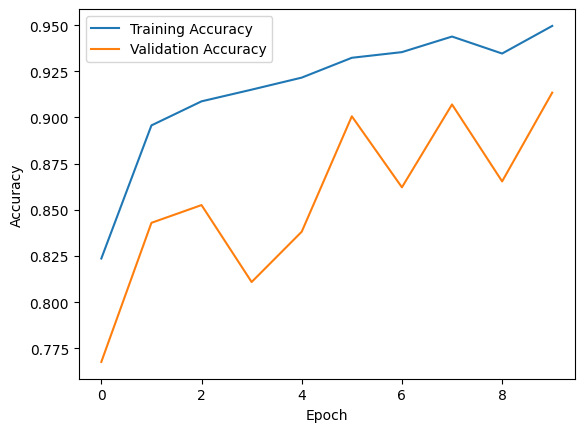

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()